In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

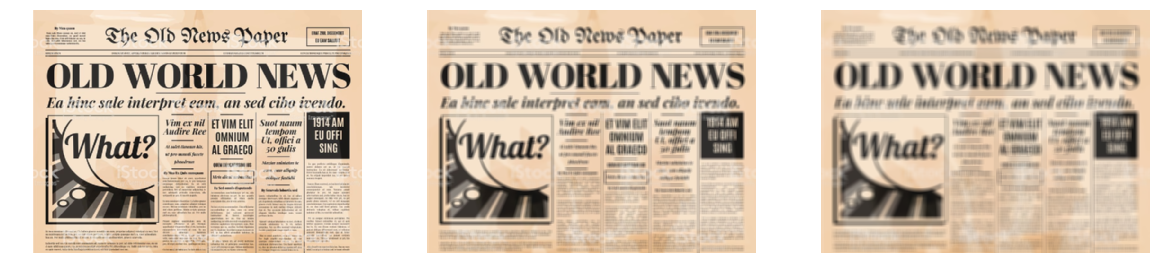

In [2]:
# Import the image and convert to RGB 
img = cv2.imread('text.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot the image with different kernel sizes
kernels = [5, 11, 17]
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))
for ind, s in enumerate(kernels):
    img_blurred = cv2.blur(img, ksize = (s, s))
    ax = axs[ind]
    ax.imshow(img_blurred)
    ax.axis('off')
plt.show()

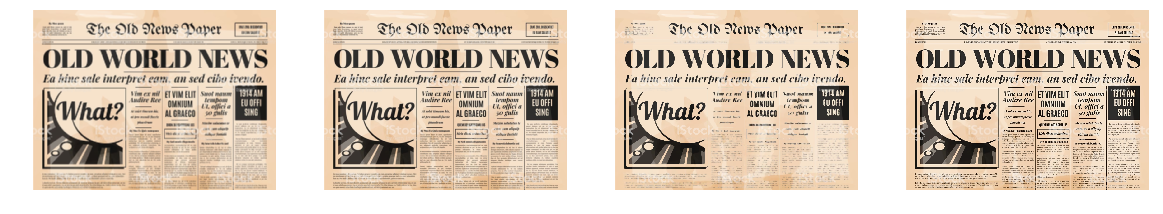

In [3]:
# Blur the image 
img_0 = cv2.blur(img, ksize = (7, 7))
img_1 = cv2.GaussianBlur(img, ksize = (7, 7), sigmaX = 0)   
img_2 = cv2.medianBlur(img, 7)
img_3 = cv2.bilateralFilter(img, 7, sigmaSpace = 75, sigmaColor =75)
# Plot the images
images = [img_0, img_1, img_2, img_3]
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 20))
for ind, p in enumerate(images):
    ax = axs[ind]
    ax.imshow(p)
    ax.axis('off')
plt.show()

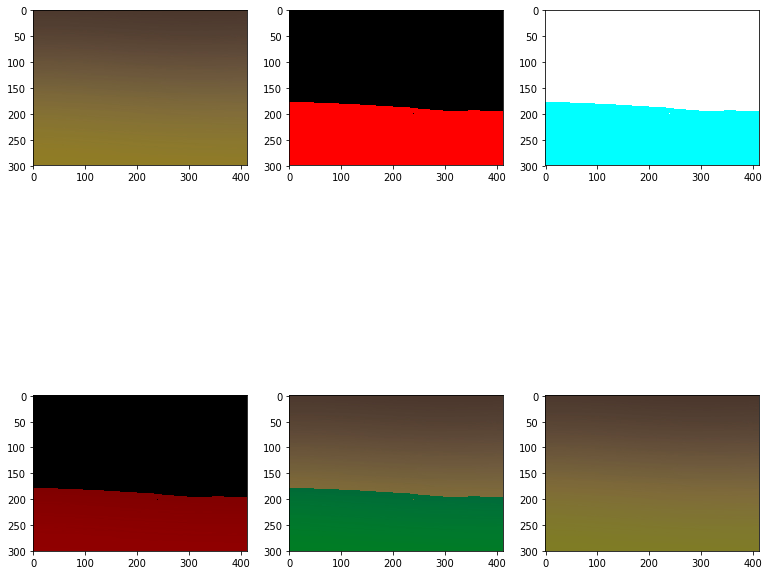

In [4]:
img = cv2.imread('gradation.jpg')
# Thresholding 
_, thresh_0 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, thresh_1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh_2 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, thresh_3 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
_, thresh_4 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
# Plot the images
images = [img, thresh_0, thresh_1, thresh_2, thresh_3, thresh_4]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (13, 13))
for ind, p in enumerate(images):
    ax = axs[ind//3, ind%3]
    ax.imshow(p)
plt.show()

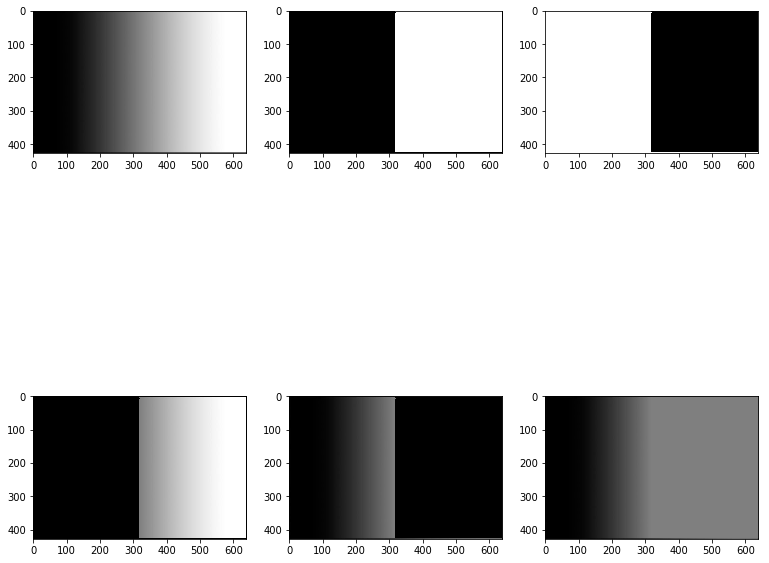

In [5]:
img = cv2.imread('gradation_b.jpg')
# Thresholding 
_, thresh_0 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, thresh_1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh_2 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, thresh_3 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
_, thresh_4 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
# Plot the images
images = [img, thresh_0, thresh_1, thresh_2, thresh_3, thresh_4]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (13, 13))
for ind, p in enumerate(images):
    ax = axs[ind//3, ind%3]
    ax.imshow(p)
plt.show()

In [6]:
# Convert the image to grayscale
img = cv2.imread('text.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Adaptive Thresholding
_, thresh_binary = cv2.threshold(img, thresh = 127, maxval = 255, type = cv2.THRESH_BINARY)
adap_mean_2 = cv2.adaptiveThreshold(img, 255, 
                                    cv2.ADAPTIVE_THRESH_MEAN_C, 
                                    cv2.THRESH_BINARY, 7, 2)
adap_mean_2_inv = cv2.adaptiveThreshold(img, 255, 
                                        cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY_INV, 7, 2)
adap_mean_8 = cv2.adaptiveThreshold(img, 255, 
                                    cv2.ADAPTIVE_THRESH_MEAN_C, 
                                    cv2.THRESH_BINARY, 7, 8)
adap_gaussian_8 = cv2.adaptiveThreshold(img, 255, 
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                    cv2.THRESH_BINARY, 7, 8)

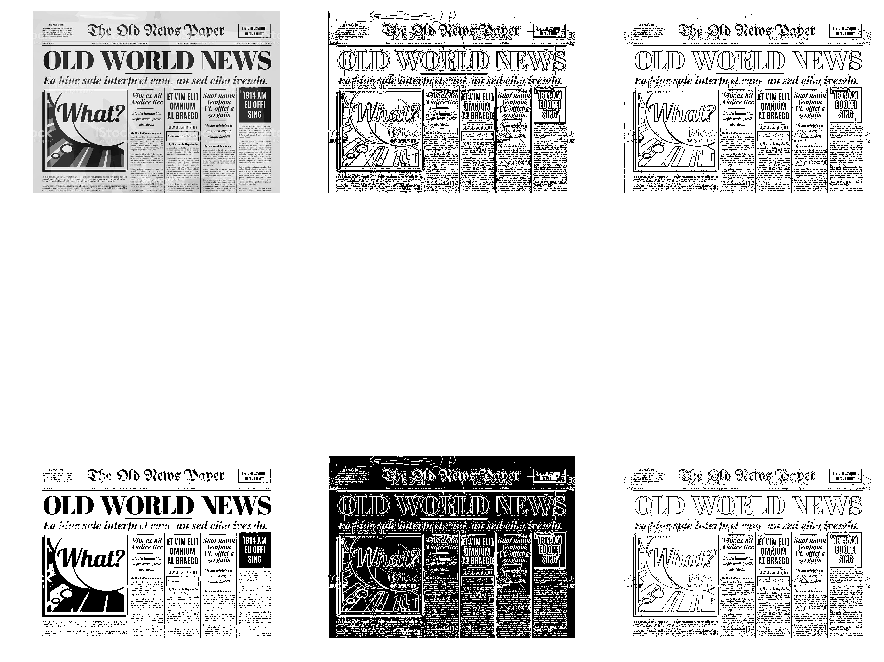

In [7]:
# Plot the images
images = [img, thresh_binary, adap_mean_2, adap_mean_2_inv, 
          adap_mean_8, adap_gaussian_8]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 15))
for ind, p in enumerate(images):
    ax = axs[ind%2, ind//2]
    ax.imshow(p, cmap = 'gray')
    ax.axis('off')
plt.show()

In [8]:
# Apply gradient filtering
sobel_x = cv2.Sobel(img, cv2.CV_64F, dx = 1, dy = 0, ksize = 5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, dx = 0, dy = 1, ksize = 5)
blended = cv2.addWeighted(src1=sobel_x, alpha=0.5, src2=sobel_y,
                          beta=0.5, gamma=0)
laplacian = cv2.Laplacian(img, cv2.CV_64F)

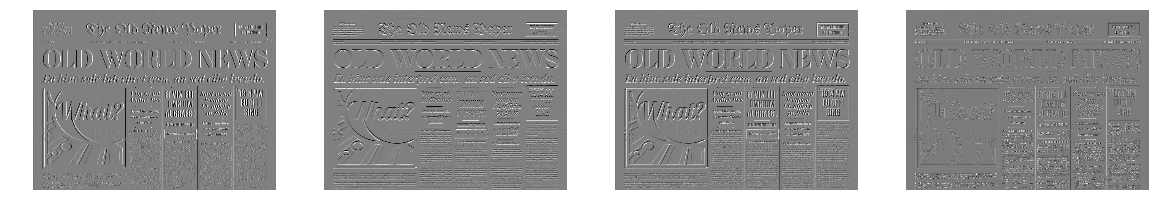

In [9]:
# Plot the images
images = [sobel_x, sobel_y, blended, laplacian]
plt.figure(figsize = (20, 20))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap = 'gray')
    plt.axis('off')
plt.show()

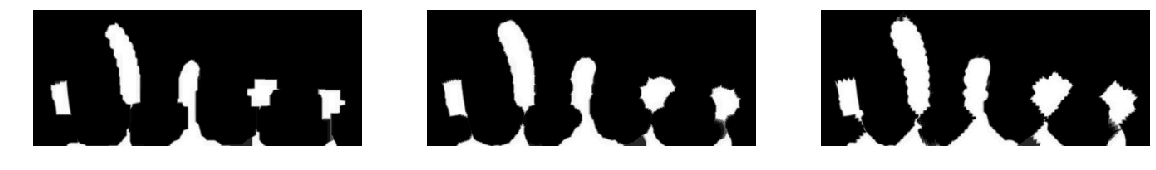

In [10]:
img = cv2.imread('simpson.jpg')
# Create erosion kernels 
kernel_0 = np.ones((9, 9), np.uint8)
kernel_1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
kernel_2 = cv2.getStructuringElement(cv2.MORPH_CROSS, (9, 9))
kernels = [kernel_0, kernel_1, kernel_2]
# Plot the images
plt.figure(figsize = (20, 20))
for i in range(3):
    img_copy = img.copy()
    img_copy = cv2.erode(img_copy, kernels[i], iterations = 3)
    plt.subplot(1, 3, i+1)
    plt.imshow(img_copy)
    plt.axis('off')
plt.show()

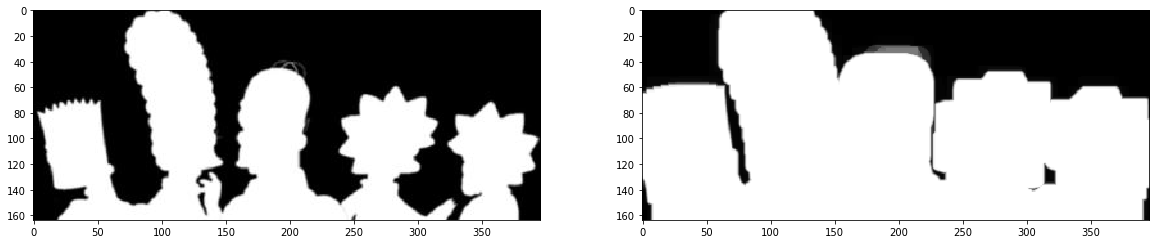

In [11]:
# Apply dilation
kernel = np.ones((9, 9), np.uint8)
img_dilate = cv2.dilate(img, kernel, iterations = 3)
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1); plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2); plt.imshow(img_dilate, cmap="gray")
plt.show()

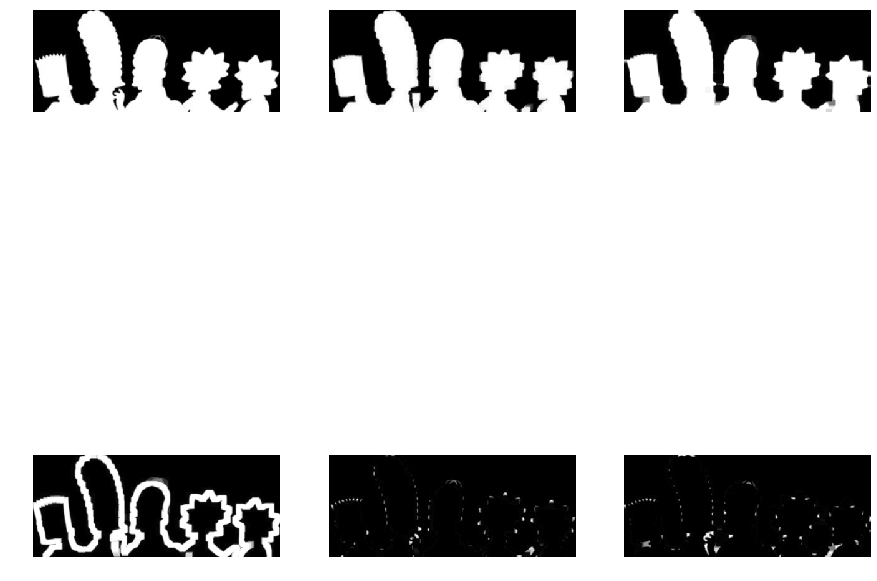

In [12]:
# Apply the operations
kernel = np.ones((9, 9), np.uint8)
#img_open = cv2.morphologyEx(img, op= cv2.MORPH_OPEN, kernel)
#img_close = cv2.morphologyEx(img, op= cv2.MORPH_CLOSE, kernel)
#img_grad = cv2.morphologyEx(img, op= cv2.MORPH_GRADIENT, kernel)
#img_tophat = cv2.morphologyEx(img, op= cv2.MORPH_TOPHAT, kernel)
#img_blackhat = cv2.morphologyEx(img, op= cv2.MORPH_BLACKHAT, kernel)
img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
img_close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
img_grad = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
img_tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
img_blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
# Plot the images
images = [img, img_open, img_close, img_grad, 
          img_tophat, img_blackhat]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 15))
for ind, p in enumerate(images):
    ax = axs[ind//3, ind%3]
    ax.imshow(p, cmap = 'gray')
    ax.axis('off')
plt.show()